In [4]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [38]:
# load iris data

iris = load_iris()

# create X (features) and y(response)
X = iris.data
y = iris.target

In [6]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred)

1.0


In [7]:
# sample 5-fold cross validation
from sklearn.cross_validation import KFold
kf = KFold(25, n_folds=5, shuffle = False)

# print the contents of each training set and testing set
print '{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations')
for iteration, data in enumerate(kf, start=1):
    print '{:^9} {} {:^25}'.format(iteration, data[0], data[1])

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


In [8]:
# cross validation for parameter tuning
# goal: select best tuning parameters for KNN on the iris dataset

In [9]:
from sklearn.cross_validation import cross_val_score

In [10]:
# 10-fold cross validation with KNN with k=5
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print scores

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [11]:
# average accuracy
print scores.mean()

0.966666666667


In [12]:
# search for an optimal value of k for KNN
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print k_scores

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

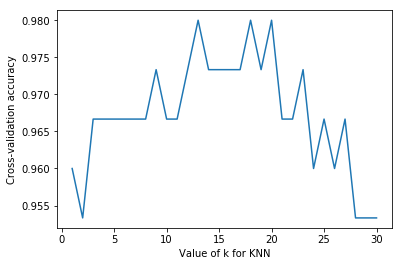

In [14]:
# plot the value of k for KNN vs cross-validation accuracy
plt.plot(k_range, k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-validation accuracy')

In [15]:
# cross validation for model selection
# goal: compare the best KNN model with logistic regression on the iris dataset

In [16]:
# 10-fold cross-validation with best KNN model
knn = KNeighborsClassifier(n_neighbors=20)
print cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()

0.98


In [17]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean()

0.953333333333


In [18]:
# cross validation for feature selection
# goal: select whether newspaper should be included in the linear regression model on the advertising dataset

In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [20]:
# read the dataset
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [21]:
feature_cols = ['TV', 'radio','newspaper']
X = data[feature_cols]
y = data.sales

In [22]:
linreg = LinearRegression()
scores = cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')
print scores

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [28]:
mse_scores = -scores

In [29]:
mse_scores

array([ 3.56038438,  3.29767522,  2.08943356,  2.82474283,  1.3027754 ,
        1.74163618,  8.17338214,  2.11409746,  3.04273109,  2.45281793])

In [30]:
rmse_scores = np.sqrt(mse_scores)
rmse_scores.mean()

1.6913531708051792

In [31]:
# 1- fold cross validation with 2 features
feature_cols = ['TV', 'radio']
X = data[feature_cols]
y = data.sales

In [32]:
print np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean()

1.67967484191


In [47]:
# Grid Search CV
# allows you to define a grid of parameters that will be searched using K-fold cross validation
from sklearn.grid_search import GridSearchCV

In [41]:
# define the paramter values that should be searched
k_range = range(1,31)
print k_range

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [42]:
# create a parameter grid: map the parameter names to the values that should be searched
# param_grid lets the model repeat the cross validation for all the parameters
param_grid = dict(n_neighbors=k_range)
print param_grid

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [43]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [44]:
# fit the grid with the data
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [45]:
# view the complete results
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 11},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 12},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 17},
 mean:

In [46]:
print grid.grid_scores_[0].parameters

{'n_neighbors': 1}


In [48]:
print grid.grid_scores_[0].cv_validation_scores

[ 1.          0.93333333  1.          0.93333333  0.86666667  1.
  0.86666667  1.          1.          1.        ]


In [49]:
print grid.grid_scores_[0].mean_validation_score

0.96


In [51]:
# create a list of mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores

[0.96, 0.9533333333333334, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.98, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.98, 0.9733333333333334, 0.98, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.96, 0.9666666666666667, 0.96, 0.9666666666666667, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


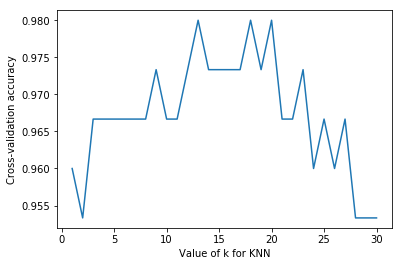

In [53]:
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-validation accuracy')

In [54]:
print grid.best_score_

0.98


In [55]:
print grid.best_params_

{'n_neighbors': 13}


In [56]:
print grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


In [57]:
# searching multiple parameters simultaneously
# tuning max_depth and min_samples_leaf for a DecisionTreeClassifier

In [58]:
# by default grid search CV will fit the entire data set with the best parameters of the model

In [61]:
grid.predict([[3,4,5,2],[5,3,4,2]])

array([1, 1])

In [62]:
# RandomizedSearchCV

In [63]:
# searching many different parameters at once may be computationally infeasible
# RandomizedSearchCV searches a random subset of the parameters, and you control the computational budget

In [64]:
from sklearn.grid_search import RandomizedSearchCV

In [70]:
# specify paramter distribution rather than paramter grid
param_dist = dict(n_neighbors=k_range)

In [71]:
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)

In [72]:
rand.fit(X,y)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform'),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
          pre_dispatch='2*n_jobs', random_state=5, refit=True,
          scoring='accuracy', verbose=0)

In [73]:
rand.grid_scores_

[mean: 0.97333, std: 0.03266, params: {'n_neighbors': 12},
 mean: 0.95333, std: 0.04269, params: {'n_neighbors': 30},
 mean: 0.96000, std: 0.04422, params: {'n_neighbors': 24},
 mean: 0.96000, std: 0.04422, params: {'n_neighbors': 26},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 19},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 11},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 27},
 mean: 0.96667, std: 0.03333, params: {'n_neighbors': 22}]

In [74]:
print rand.best_score_
print rand.best_params_

0.973333333333
{'n_neighbors': 12}
